In [59]:
from DataLoader.loader import FootballData
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn import linear_model

In [60]:
data = FootballData(2022)

data.data

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2022091106,2022-09-11,2,1,17,MIA,NE,2,10,55,...,0,0,NaN,45,OPP,0,NaN,0,NaN,0
1,2022091106,2022-09-11,3,7,4,NE,MIA,4,1,72,...,0,0,NaN,28,OPP,1,MIA,1,ILLEGAL CONTACT,5
2,2022091106,2022-09-11,3,6,57,NE,MIA,1,10,77,...,0,0,CENTER,23,OPP,0,NaN,0,NaN,0
3,2022091106,2022-09-11,3,6,17,NE,MIA,2,10,77,...,0,0,NaN,23,OPP,0,NaN,0,NaN,0
4,2022091106,2022-09-11,4,9,46,NE,MIA,4,3,100,...,0,0,NaN,0,OPP,0,NE,0,OFFENSIVE HOLDING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38593,2022091101,2022-09-11,4,4,59,CLE,CAR,2,7,28,...,0,0,CENTER,28,OWN,0,NaN,0,NaN,0
38594,2022091101,2022-09-11,4,5,36,CLE,CAR,1,15,20,...,0,0,NaN,20,OWN,0,NaN,0,NaN,0
38595,2022091101,2022-09-11,4,6,2,CLE,CAR,1,10,25,...,0,0,NaN,25,OWN,1,CLE,1,INELIGIBLE DOWNFIELD PASS,5
38596,2022091101,2022-09-11,4,6,2,CAR,CLE,0,0,35,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0


In [61]:
data.data.columns, data.data['Down'], data.data['IsRush']

(Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
        'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
        'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
        'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
        'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
        'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
        'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
        'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
        'RushDirection', 'YardLineFixed', 'YardLineDirection',
        'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
        'PenaltyYards'],
       dtype='object'),
 0        2
 1        4
 2        1
 3        2
 4        4
         ..
 38593    2
 38594    1
 38595    1
 38596    0
 38597    0
 Name: Down, Length: 38598, dtype: int64,
 0        0
 1        0
 2        1
 3        0
 4        0

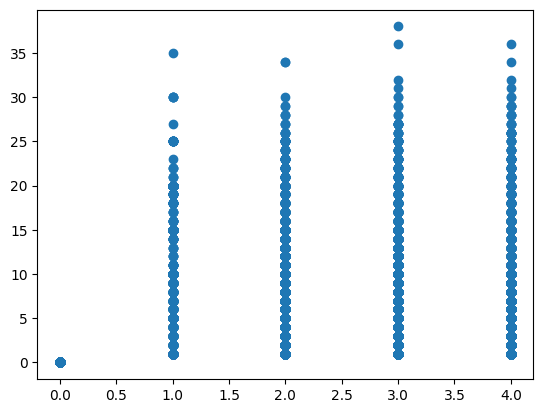

In [29]:
plt.scatter(data.data['Down'], data.data['ToGo'])

In [69]:

InputLimit = 10000

X = np.array([data.data['Down'][:InputLimit], data.data['ToGo'][:InputLimit], data.data['Quarter'][:InputLimit], data.data['Minute'][:InputLimit], data.data['Second'][:InputLimit]]).T
rushY = np.array([data.data['IsRush'][:InputLimit]]).T
passY = np.array([data.data['IsPass'][:InputLimit]]).T

filterX = []
filterRushY = []
filterPassY = []

for i in range(2000):
    if rushY[i] == 1 or passY[i] == 1:
        filterX.append(X[i])
        filterRushY.append(rushY[i])
        filterPassY.append(passY[i])

X = np.array(filterX)
rushY = np.array(filterRushY)
passY = np.array(filterPassY)


In [70]:
rushModel = linear_model.LinearRegression().fit(X, rushY)
passModel = linear_model.LinearRegression().fit(X, passY)

rushModel.score(X, rushY), passModel.score(X, passY)

(0.09033897021316317, 0.09033897021316317)

In [74]:
X = np.array([[3, 7, 4, 2, 23]])
rushModel.predict(X), passModel.predict(X)

(array([[0.2451306]]), array([[0.7548694]]))